# HVAC model

Create some data.

## The HVAC Linear model 

Read in the itemc data.

In [10]:
import cufflinks as cl
import json
import pandas as pd

In [13]:
data = json.loads(open("itemc_house_0.json").read())
df = pd.DataFrame(data['timeseries'])
df['index'] = pd.to_datetime(df['index'])
df.set_index('index', inplace=True)

In [14]:
df[['air_temperature','cooling_setpoint', 'outdoor_temperature']].iplot()

In [15]:
df[['hvac_power']].iplot()

## The model 

Create a linear model that estimates the power needed to cool the house over a `24` hour period.

In [12]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [13]:
tmp = df.copy()
tmp['previous_air_temperature'] = tmp['air_temperature'].shift(1).values
tmp.ix[0, 'previous_air_temperature'] = tmp.ix[0, 'air_temperature']

X = tmp[['hvac_power', 'outdoor_temperature', 'previous_air_temperature']].as_matrix()
y = tmp['air_temperature']
linmodel = LinearRegression()
linmodel.fit(X, y)
linmodel.score(X, y)

0.99838962598492309

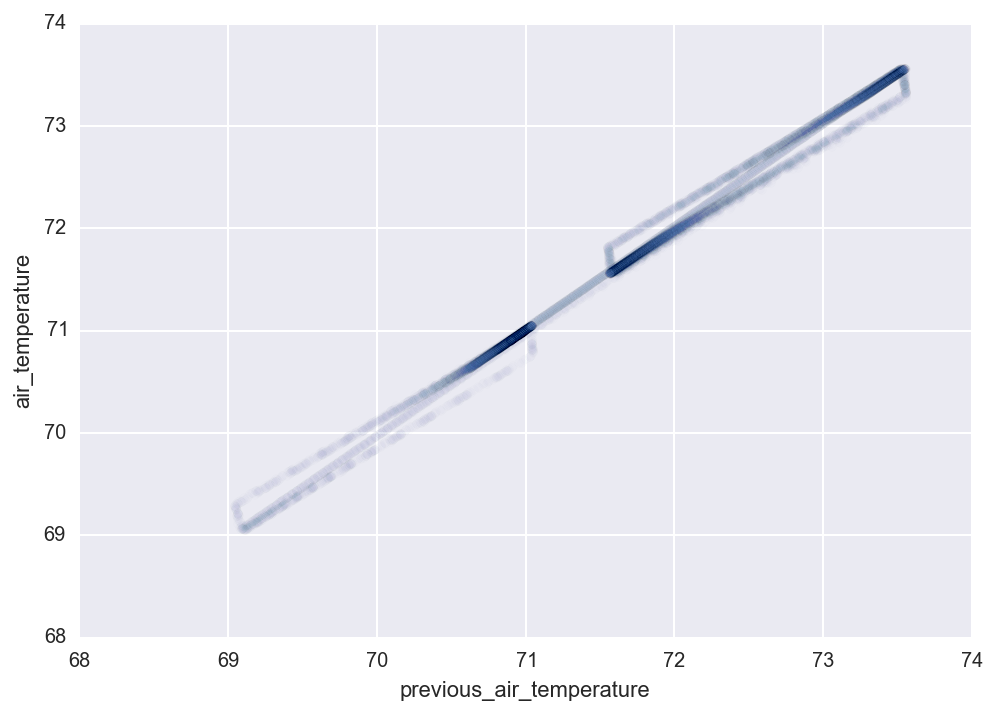

In [23]:
tmp[['air_temperature', 'previous_air_temperature']].plot(kind="scatter", 
                                                           x="previous_air_temperature", 
                                                           y="air_temperature", alpha=0.01)

In [28]:
X = tmp[['air_temperature', 'outdoor_temperature', 'previous_air_temperature']].as_matrix()
y = tmp['hvac_power']
linmodel = LinearRegression()
linmodel.fit(X, y)
linmodel.score(X, y)

0.78869083461930489

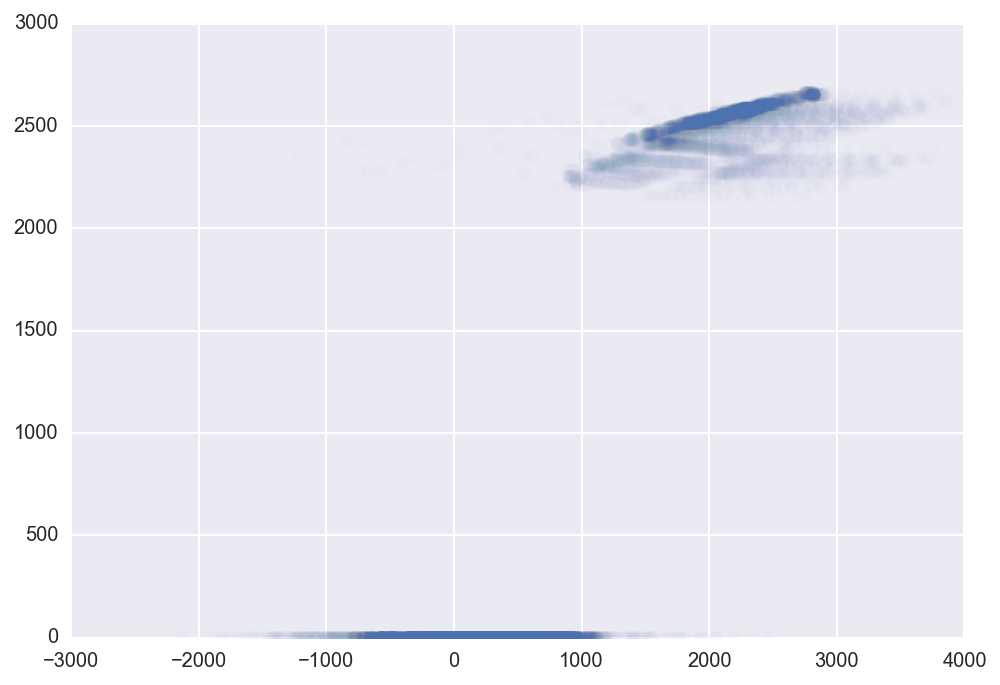

In [29]:
y_est = linmodel.predict(X)
plt.plot(y_est, y, 'o', alpha=0.01)

### Formulate as a classification problem?

In [30]:
# tmp = df.copy()
# tmp['previous_air_temperature'] = tmp['air_temperature'].shift(1).values
# tmp.ix[0, 'previous_air_temperature'] = tmp.ix[0, 'air_temperature']
# samp = tmp.resample("5min", how='mean')
# samp['hvac_power'] = tmp['hvac_power'].resample("5min", how='mean')

# plt.plot(samp[['hvac_power']].sort_values(by="hvac_power").values)

In [31]:
tmp = df.copy()
tmp['previous_air_temperature'] = tmp['air_temperature'].shift(1).values
tmp.ix[0, 'previous_air_temperature'] = tmp.ix[0, 'air_temperature']

samp = tmp.resample("5min", how='mean')
                                                
X = samp[['air_temperature', 'outdoor_temperature', 'previous_air_temperature']].as_matrix()

In [34]:
y = samp['hvac_power'].values.copy()
y[y<1500] = 0
y[y>=1500] = 1
y.sum()

948.0

In [35]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X, y)
clf.score(X, y)

0.88754259750094666

(-0.5, 1.5)

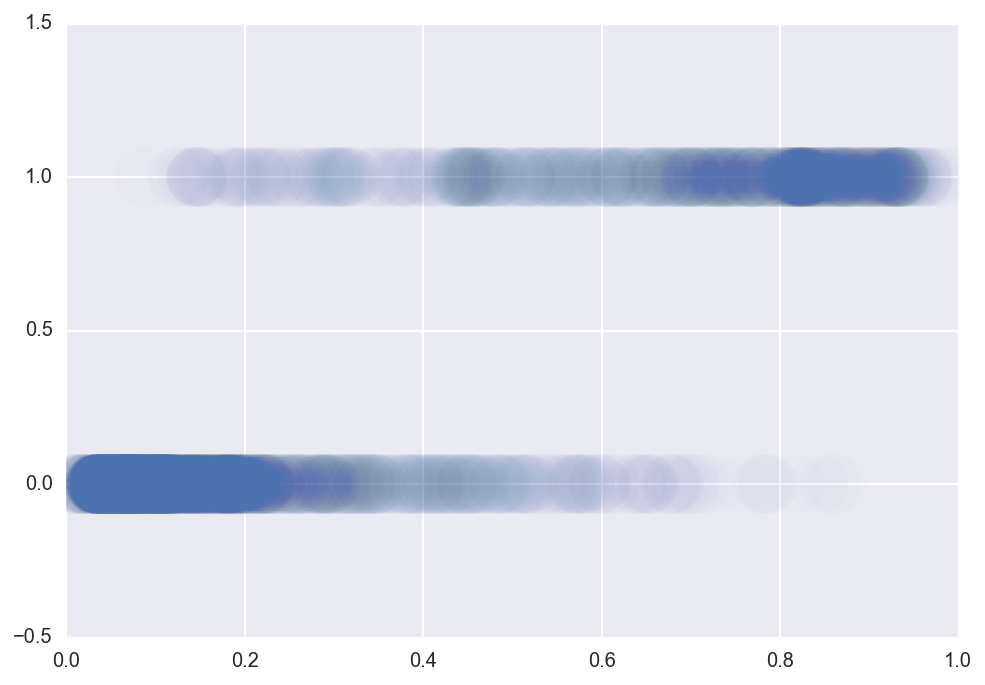

In [36]:
y_est = clf.predict_proba(X)[:, 1]
plt.plot(y_est, y, 'o', alpha=0.01, markersize=30)
plt.ylim(-0.5, 1.5)